# Challenge: What test to use  
Estimated Time: 2-3 hours  
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.  

In this dataset, the same participants answered questions in 2012 and again 2014.

In [90]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pylab as plt
import itertools

In [2]:
ESS_df = pd.read_csv('ESSdata_Thinkful.csv')

In [17]:
ESS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [130]:
def test_normalcy(grp_labels, grp_dfs, trait_label):
    for ik in range(len(grp_labels)):
        print(grp_labels[ik], ':', '(nans)', grp_dfs[ik][trait_label].isna().sum(), 
              '(total length)', len(grp_dfs[ik][trait_label]))
    print('standard deviations:', [grp_dfs[ik][trait_label].dropna().std() for ik in range(len(grp_labels))])
    print('Shapiro-Wilk Test:', [stats.shapiro(grp_dfs[ik][trait_label].dropna()) for ik in range(len(grp_labels))])


In [141]:
# function to run and report test results
def run_test(test, grp_labels, grp_dfs, trait_label, characteristic, **kwargs):
    ij_vect = [ij for ij in range(len(grp_dfs)) if len(grp_dfs[ij][trait_label].dropna())>3]
    if len(ij_vect)>1:
        data = [grp_dfs[ij][trait_label] for ij in ij_vect]
    
    if test == 'paired_ttest':
        t, p = stats.ttest_rel(*data, nan_policy = 'omit')
    elif test == 'unpaired_ttest':
        t, p = stats.ttest_ind(*data, nan_policy = 'omit')
    elif test == 'oneway_anova':
        try:
            f, p = stats.f_oneway(*[data_set.dropna() for data_set in data])
        except:
            p = np.nan
    
    if p<.05:
        if 'ttest' in test:
            if (grp_dfs[1][trait_label].mean() > grp_dfs[0][trait_label].mean()):
                    print('*population:', grp_labels[1], 'is greater in ', characteristic, 'than population:',grp_labels[0] )
                    print('\t',grp_labels[0],':', grp_dfs[0][trait_label].mean(),'\n\t', grp_labels[1],':', grp_dfs[1][trait_label].mean(), 'p:', p)
            else:
                    print('*population:', grp_labels[1], 'is less in ', characteristic, 'than population:',grp_labels[0] )
                    print('\t', grp_labels[0],':', grp_dfs[0][trait_label].mean(),'\n\t', grp_labels[1],':', grp_dfs[1][trait_label].mean(), 'p:', p)
    else:
        print([grp_labels[ij] for ij in ij_vect], 'There is no statistical difference between the populations.  p =',p )
        ij_vect = []
    return ij_vect

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [133]:
grp_labels = ['2012', '2014']
grp_dfs = [grps_gender[0][1], grps_gender[1][1]]
trait_label = 'ppltrst'
characteristic = 'trustworthiness'

grps_cntry = ESS_df.groupby('cntry')
for cntry_grp in grps_cntry:
    print('\n', cntry_grp[0])
    grp_dfs = [grp[1] for grp in cntry_grp[1].groupby('year')]
    run_test('paired_ttest', grp_labels, grp_dfs, trait_label, characteristic)


 CH
['2012', '2014'] There is no statistical difference between the populations.  p = 0.5102943511301135

 CZ
['2012', '2014'] There is no statistical difference between the populations.  p = 0.617129268240474

 DE
['2012', '2014'] There is no statistical difference between the populations.  p = 0.8568563797095805

 ES
*population: 2014 is less in  trustworthiness than population: 2012
	 2012 : 5.114591920857379 2014 : 4.895127993393889 p: 0.014181580725320284

 NO
['2012', '2014'] There is no statistical difference between the populations.  p = 0.61209257015177

 SE
*population: 2014 is greater in  trustworthiness than population: 2012
	 2012 : 6.058498896247241 2014 : 6.257709251101321 p: 0.03900781670958545


It appears that in Sweden and Spain, people viewed the population as different in its level of trustworthiness between 2014 and 2012 (based on a p= .05 threshold). In all other contries considered, there wasn't a statistical difference between attitudes in 2012 and 2014.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [134]:
grp_labels = ['2012', '2014']
trait_label = 'happy'
characteristic = 'happiness'

grps_cntry = ESS_df.groupby('cntry')
for cntry_grp in grps_cntry:
    print('\n', cntry_grp[0])
    grp_dfs = [grp[1] for grp in cntry_grp[1].groupby('year')]
    run_test('paired_ttest', grp_labels, grp_dfs, trait_label, characteristic)



 CH
['2012', '2014'] There is no statistical difference between the populations.  p = 0.7495001355429063

 CZ
['2012', '2014'] There is no statistical difference between the populations.  p = 0.1458454843389451

 DE
['2012', '2014'] There is no statistical difference between the populations.  p = 0.4346138707734991

 ES
['2012', '2014'] There is no statistical difference between the populations.  p = 0.10682451556479494

 NO
*population: 2014 is less in  happiness than population: 2012
	 2012 : 8.25171939477304 2014 : 7.9151846785225715 p: 2.067453013405473e-05

 SE
['2012', '2014'] There is no statistical difference between the populations.  p = 0.5768709591233714


In [142]:
grp_labels = ['2012', '2014']
trait_label = 'happy'
characteristic = 'happiness'

grps_cntry = ESS_df.groupby('cntry')
for cntry_grp in grps_cntry:
    print('\n', cntry_grp[0])
    grp_dfs = [grp[1] for grp in cntry_grp[1].groupby('year')]
    run_test('paired_ttest', grp_labels, grp_dfs, trait_label, characteristic)



 CH
['2012', '2014'] There is no statistical difference between the populations.  p = 0.7495001355429063

 CZ
['2012', '2014'] There is no statistical difference between the populations.  p = 0.1458454843389451

 DE
['2012', '2014'] There is no statistical difference between the populations.  p = 0.4346138707734991

 ES
['2012', '2014'] There is no statistical difference between the populations.  p = 0.10682451556479494

 NO
*population: 2014 is less in  happiness than population: 2012
	 2012 : 8.25171939477304 
	 2014 : 7.9151846785225715 p: 2.067453013405473e-05

 SE
['2012', '2014'] There is no statistical difference between the populations.  p = 0.5768709591233714


3. Who reported watching more TV in 2012, men or women?

In [136]:
grp_labels = ['male', 'female']
grp_dfs = [grp[1] for grp in ESS_df.groupby('gndr')]
trait_label = 'tvtot'
characteristic = 'tv watching'

run_test('unpaired_ttest', grp_labels, grp_dfs, trait_label, characteristic)

['male', 'female'] There is no statistical difference between the populations.  p = 0.12438553359970589


[]

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [143]:
grp_labels = ['living with a partner', 'does not live with partner']
grp_dfs = [grp[1] for grp in ESS_df[ESS_df.year == 6].groupby('partner')]
trait_label = 'pplfair'
characteristic = 'believing people were fair'

run_test('unpaired_ttest', grp_labels, grp_dfs, trait_label, characteristic)

*population: does not live with partner is less in  believing people were fair than population: living with a partner
	 living with a partner : 6.080736012016523 
	 does not live with partner : 5.856965174129353 p: 0.0009073952609876207


[0, 1]

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [144]:
grp_labels = [grp[0] for grp in ESS_df[ESS_df.year == 7].groupby('cntry')]
grp_dfs = [grp[1] for grp in ESS_df[ESS_df.year == 7].groupby('cntry')]
trait_label = 'sclmeet'
#['Never', 'Less than once a month', 'Once a month', 'Several times a month', 'Once a week','Several times a week', 'Every day']
characteristic = 'how often people met socially'

ij_vect = run_test('oneway_anova', grp_labels, grp_dfs, trait_label, characteristic)
print(ij_vect)
if len(ij_vect)>2:
    # create every combination of country pairs
    combs = itertools.combinations(ij_vect, 2)
    # run unpaired ttests
    for comb in combs:
        grp_labels_sub = [grp_labels[ij] for ij in comb]
        grp_dfs_sub = [grp_dfs[ij] for ij in comb]
        ij_vect_temp = run_test('unpaired_ttest', grp_labels_sub, grp_dfs_sub, trait_label, characteristic)
print('-------------------------')

[0, 1, 2, 3, 4, 5]
*population: CZ is less in  how often people met socially than population: CH
	 CH : 5.160621761658031 
	 CZ : 4.445801526717557 p: 1.7204743885389243e-21
*population: DE is less in  how often people met socially than population: CH
	 CH : 5.160621761658031 
	 DE : 4.428571428571429 p: 0.03728960471414963
['CH', 'ES'] There is no statistical difference between the populations.  p = 0.12510774525055496
*population: NO is greater in  how often people met socially than population: CH
	 CH : 5.160621761658031 
	 NO : 5.3023255813953485 p: 0.0388144852886944
*population: SE is greater in  how often people met socially than population: CH
	 CH : 5.160621761658031 
	 SE : 5.426211453744493 p: 5.6545986003136826e-05
['CZ', 'DE'] There is no statistical difference between the populations.  p = 0.9654226437202417
*population: ES is greater in  how often people met socially than population: CZ
	 CZ : 4.445801526717557 
	 ES : 5.2601156069364166 p: 3.767684440737638e-29
*populat

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

age group: (15.0, 24.9]
[0, 1, 2, 3, 4]
['CH', 'CZ'] There is no statistical difference between the populations.  p = 0.4396899912904104
['CH', 'ES'] There is no statistical difference between the populations.  p = 0.05018520185142043
['CH', 'NO'] There is no statistical difference between the populations.  p = 0.3290939099229129
['CH', 'SE'] There is no statistical difference between the populations.  p = 0.9831885309780699
*population: ES is less in  how often people took part in social activities than population: CZ
	 CZ : 2.9450549450549453 
	 ES : 2.63265306122449 p: 0.003961432396426617
['CZ', 'NO'] There is no statistical difference between the populations.  p = 0.8591190902523631
['CZ', 'SE'] There is no statistical difference between the populations.  p = 0.415225829470543
*population: NO is greater in  how often people took part in social activities than population: ES
	 ES : 2.63265306122449 
	 NO : 2.9655172413793105 p: 0.0014962260462601923
*population: SE is greater in  h

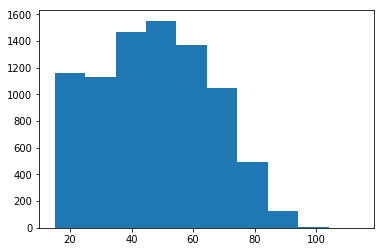

In [145]:
n, bins, patches = plt.hist(ESS_df['agea'].dropna())
ESS_df['age_bins'] = pd.cut(ESS_df['agea'], bins)

trait_label = 'sclact'
#['Never', 'Less than once a month', 'Once a month', 'Several times a month', 'Once a week','Several times a week', 'Every day']
characteristic = 'how often people took part in social activities'

# group by age
age_grps = ESS_df.groupby('age_bins')
for age_group in age_grps:
    # country groups
    grp_labels = [grp[0] for grp in age_group[1][age_group[1].year == 7].groupby('cntry')]
    grp_dfs = [grp[1] for grp in age_group[1][age_group[1].year == 7].groupby('cntry')]
    print('age group:', age_group[0])
    ij_vect = run_test('oneway_anova', grp_labels, grp_dfs, trait_label, characteristic)
    print(ij_vect)
    if len(ij_vect)>2:
        # create every combination of country pairs
        combs = itertools.combinations(ij_vect, 2)
        # run unpaired ttests
        for comb in combs:
            grp_labels_sub = [grp_labels[ij] for ij in comb]
            grp_dfs_sub = [grp_dfs[ij] for ij in comb]
            ij_vect_temp = run_test('unpaired_ttest', grp_labels_sub, grp_dfs_sub, trait_label, characteristic)
    print('-------------------------')


Age Group: 15-24.5  
Spain was less socially active than CZ, NO, or SE (the three of which were not statistically different)  

Age Group: 24.9-34.8  
Countries weren’t statistically different  

Age Group: 34.8-44.7  
Norway and Sweden were each more socially active than Spain or CZ, neither pair were statistically different in and of themselves  

Age group: (44.7, 54.6]  
Countries weren’t statistically different  

Age group: (54.6, 64.5]  
Countries weren’t statistically different  

Age group: (64.5, 74.4]  
Spain was less socially active than NO, or SE (the two of which were not statistically different)  

Age group: (74.4, 84.3]  
Norway, Sweden, and CH were all more socially active than Spain (the three of which were not statistically different)  

Age group: (84.3, 94.2]  
Norway, Sweden, and CH were all more socially active than Spain (the three of which were not statistically different)  

Sample sizes for groups above 94.2 were too small for statistics.    